# Multi-Linear Regression - Bike Sharing Assignment

# Data Understanding

In [ ]:
#Lets import the required libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#Lets make sure no columns is hidden when we are previewing
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 1000)

In [ ]:
#Reading the datafile
boombikes = pd.read_csv("day (2).csv")

In [ ]:
#Lets view the top order of the dataset
boombikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
#Lets see the descrpiptive information
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
#Lets have a overview of the data
boombikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [ ]:
boombikes.shape

(730, 16)

Observations

1. Dataset Contains 730 rows and 16 columns
2. Apart from the column 'dteday', all are with either integers or float datatype
3. Some data seems to be categorical in nature, but is in the form of int/float.

Let's analyse further


## Data Quality Check and Data Cleaning

In [ ]:
#Lets check the null values
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#Lets check the row-wise null values
boombikes[boombikes.isnull().sum(axis = 1) >= 1]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Observations

There are no null or missing values in the entire dataset

In [ ]:
#Lets check for duplicate values
boombikes[boombikes.duplicated()]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Observations

There are no duplicate values

In [ ]:
columns = boombikes.columns.tolist()
columns

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [ ]:
#Lets check the unique values or Range of values in the useful columns
columns_value_Check = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', ]

for i in columns_value_Check:
  print(boombikes[i].value_counts())
  print()
  print()

3    188
2    184
1    180
4    178
Name: season, dtype: int64


0    365
1    365
Name: yr, dtype: int64


1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64


0    709
1     21
Name: holiday, dtype: int64


1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64


1    504
0    226
Name: workingday, dtype: int64


1    463
2    246
3     21
Name: weathersit, dtype: int64




Observations

Looks like there isnt any variable looking junk or any other unknown value that entered the dataset due to errors.

The dataset looks completly fine.

# Removing unwanted columns

In [ ]:
boombikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

1. instant: column is similar to index, So this column isnt required. Therefore, lets drop this column
2. dteday : this column isnt required becuase we already have year and month column being separated within the dataset
3. Casual and registered: as per the the business goal, we are required to find the no. of bikes in total, but not with respect to specific category. Therefore, lets drop them too

In [ ]:
#Dropping unnecessary columns
boombikes_1 = boombikes.drop(columns = ["instant", "dteday", "casual", "registered"], axis = 1)

In [ ]:
boombikes_1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [ ]:
boombikes_1.shape

(730, 12)

Observations

After dropping the unncessary columns we have 12 columns in the dataset

# Handeling Categorical Variables


Lets do the conversion of these columns to categorical string variables for further analysis

1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
4. weekday : day of the week
5. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
6. mnth: Jan to Dec according to month numbers from 1 to 12
6. weathersit :

    1: Clear, Few clouds, Partly cloudy, Partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
# Column --> Season
#Lets see the count of each season
boombikes_1.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [ ]:
boombikes_1['season'] = boombikes_1['season'].replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

In [ ]:
#Lets Verify
boombikes_1.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [ ]:
# Column --> Mnth
boombikes.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [ ]:
boombikes_1["mnth"] = boombikes_1.mnth.replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7: "Jul", 8: "Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

In [ ]:
boombikes_1["mnth"].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [ ]:
# column --> weekday
boombikes_1.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [ ]:
boombikes_1["weekday"] = boombikes_1.weekday.replace({0:"Sun", 1:"Mon", 2:"Tues", 3:"Wed", 4:"Thur", 5:"Fri", 6:"Sat"})

Note: Since the first date "01-01-2018" falls on Monday. Therefore, Lets consider 0 as sunday upto 6 as saturday in that order

In [ ]:
boombikes_1["weekday"].value_counts()

Mon     105
Tues    105
Wed     104
Thur    104
Fri     104
Sat     104
Sun     104
Name: weekday, dtype: int64

In [ ]:
boombikes_1.head()

season  yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0     Mon           1           2  14.110847   
1  spring   0  Jan        0    Tues           1           2  14.902598   
2  spring   0  Jan        0     Wed           1           1   8.050924   
3  spring   0  Jan        0    Thur           1           1   8.200000   
4  spring   0  Jan        0     Fri           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [ ]:
# Column --> weathersit
boombikes_1["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

Note:

Since the mapping data for weatersit is too long statements, I have considered the first word/Sentence only

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
boombikes_1["weathersit"] = boombikes_1.weathersit.replace({1:"Clear", 2:"Mist + Cloudy", 3:"Light Snow", 4:"Heavy Rain"})

In [ ]:
boombikes_1["weathersit"].value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

In [ ]:
# Lets verify all the columns
boombikes_1.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0    Tues           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0    Thur           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [ ]:
boombikes_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Observations

Ensuring that columns "Season", "mnth", "weekday" and "weathersit"

# EDA Analysis

## Univariate  Analysis

In [ ]:
# Lets check for numerical Columns
boombikes_1.select_dtypes(["int", "float"]).columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [ ]:
boombikes_1.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0    Tues           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0    Thur           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

Text(0.5, 1.0, 'Distrubution of Temperature')

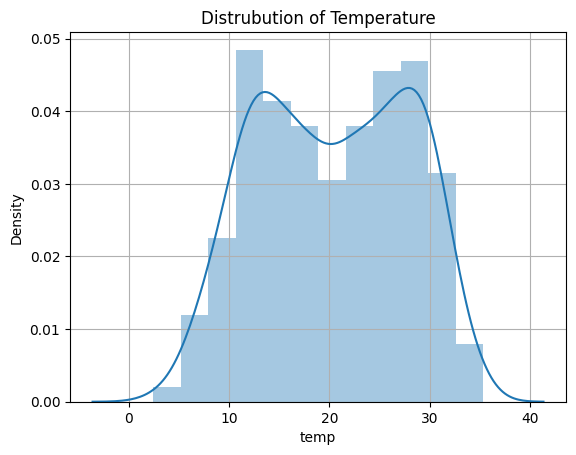

In [ ]:
# Lets see how the demand for bikes varied with respect to temperature
sns.distplot(boombikes_1.temp)
plt.grid(True)
plt.title("Distrubution of Temperature")

Observation

There is a increase demand for the bikes when temperatue is ~ 10-15 and ~25-30. Similarly there is a decrease in demand when the temperatue rise >30

Text(0.5, 1.0, 'Distrubution of Feeling Temperature')

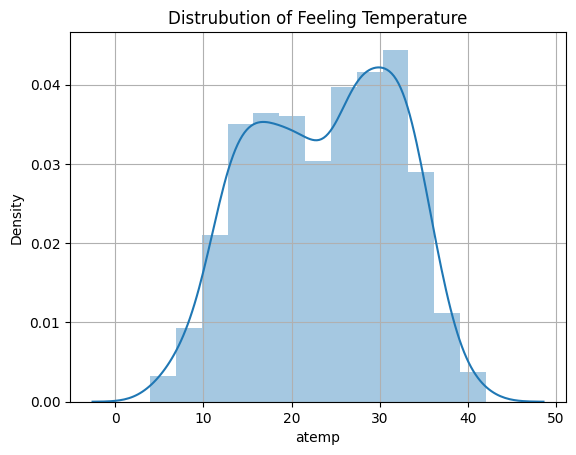

In [ ]:
# Lets see how the demand for bikes varied with respect to feeling temperature
sns.distplot(boombikes_1.atemp)
plt.grid(True)
plt.title("Distrubution of Feeling Temperature")

Observation

We can see that when feeling temperature is between ~25 - 35, we can see a demand in renting the bike

Text(0.5, 1.0, 'Distrubution of Humidity')

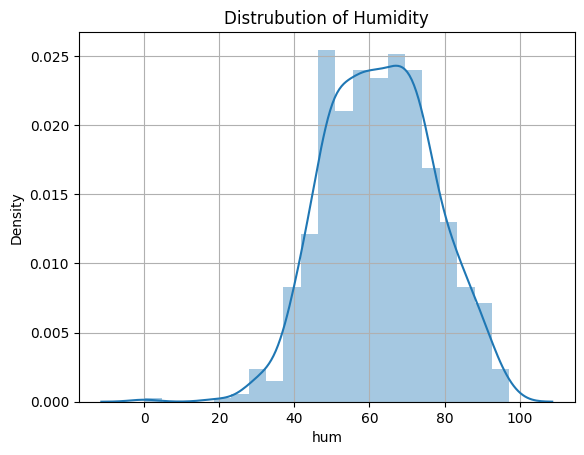

In [ ]:
# Lets see how the demand for bikes varied with respect to humidity
sns.distplot(boombikes_1.hum)
plt.grid(True)
plt.title("Distrubution of Humidity")

There is a increase demand for the bikes when humidity is ~ 40-70. Similarly there is a decrease in demand when the humidity rise >70

<Axes: xlabel='count', ylabel='workingday'>

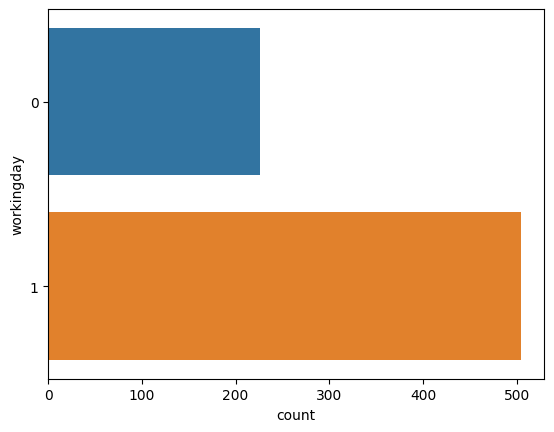

In [ ]:
# Let's see the count with respect to working day
sns.countplot(data=boombikes_1, y='workingday')

Observation

It is clearly seen that most of the bikes were rented during the working day. This probably people might have used for thier Office/university/school..etc, commute

<Axes: xlabel='count', ylabel='yr'>

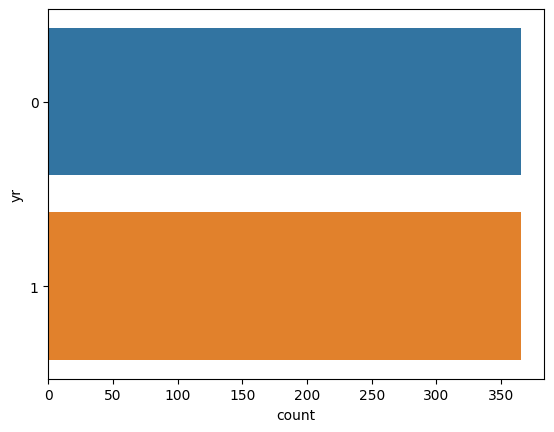

In [ ]:
#Lets see Which year had most number of bookings
sns.countplot(data=boombikes_1, y='yr')

Observation

Looks like the data is equally distrubuted. This isnt that useful

<Axes: xlabel='mnth', ylabel='count'>

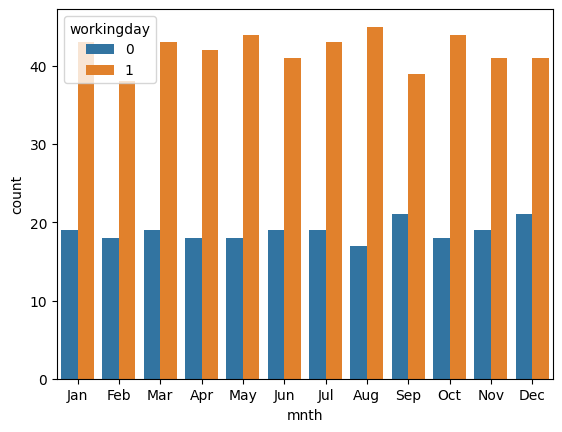

In [ ]:
#Lets see which had the most holidays
sns.countplot(data=boombikes_1, x='mnth', hue='workingday')

Observation

Almost equal no. of holidays within all the months. Mostly becuase of Saturdays and Sundays might be.

## Bivariate Analysis

In [ ]:
# Lets see the categorical columns
boombikes_1.select_dtypes(exclude = ["int", "float"]).columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

<Axes: xlabel='mnth', ylabel='cnt'>

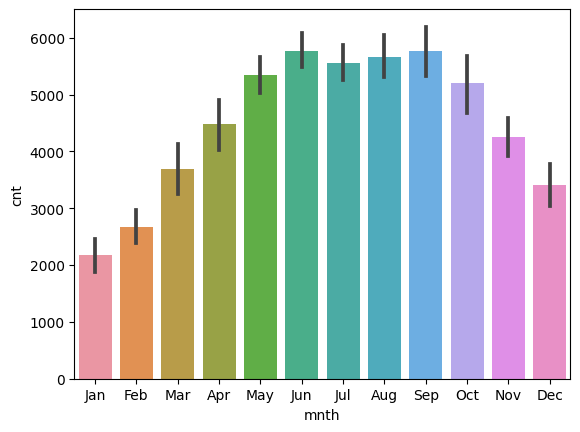

In [ ]:
# Let's see how the demand varies with respect to the months
sns.barplot(data=boombikes_1, x='mnth', y="cnt")

Observation

We can clearly see that durign the month **may-oct** the bookings have crossed 5000. This is mainly due to the summer break in the USA.

<Axes: xlabel='count', ylabel='weathersit'>

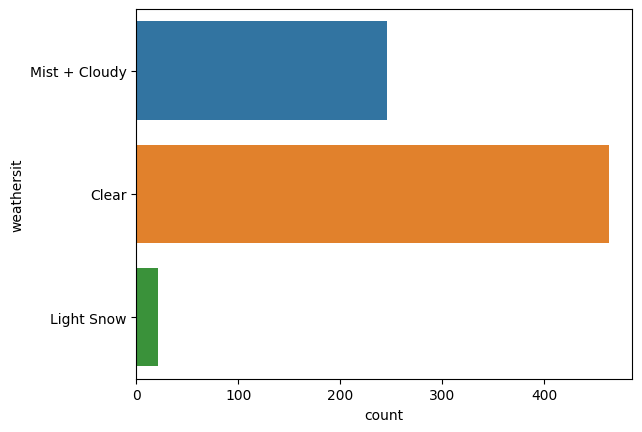

In [ ]:
# Let's see the variation with respect to weathersit
sns.countplot(data=boombikes_1, y='weathersit', orient='h')

Observation

It is clearly seen that during the clear clouds (Clear, Few clouds, Partly cloudy, Partly cloudy) more bikes are been rented.

<Axes: xlabel='season', ylabel='cnt'>

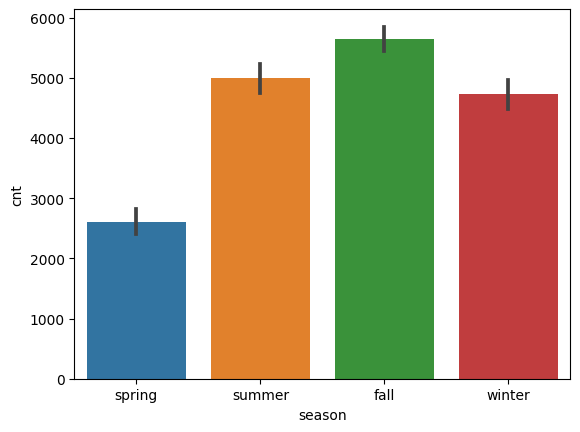

In [ ]:
#Lets see the variation with respect to seasons
sns.barplot(data=boombikes_1, x='season', y="cnt")

Observation

Almost summer and fall seasons have crossed 5000 mark in bookings, whereas there is very less booking are received during spring

<Axes: xlabel='weekday', ylabel='cnt'>

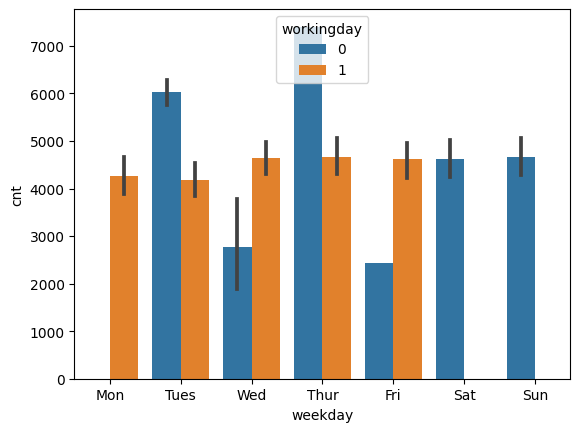

In [ ]:
# Let's see how the demand varies with respect to the weekdays
sns.barplot(data=boombikes_1, x='weekday', y="cnt", hue='workingday')

Observations

It is clearly seen that especially during weekends the count is close to 5000. And During weekdays the working people use regularly to commute, thus the count of bikes being rented during weekdays is almost equal.

In [ ]:
boombikes_1.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0    Tues           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0    Thur           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

<Axes: xlabel='mnth', ylabel='cnt'>

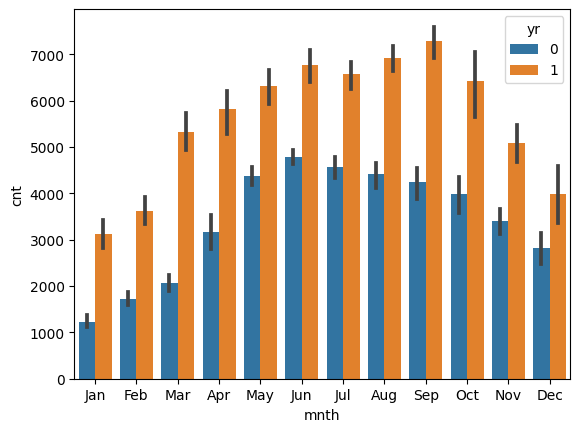

In [ ]:
sns.barplot(data=boombikes_1, x='mnth', y="cnt", hue='yr')

Observaation

Conpared to 2018, 2019 had the most rentals

<Axes: xlabel='weathersit', ylabel='cnt'>

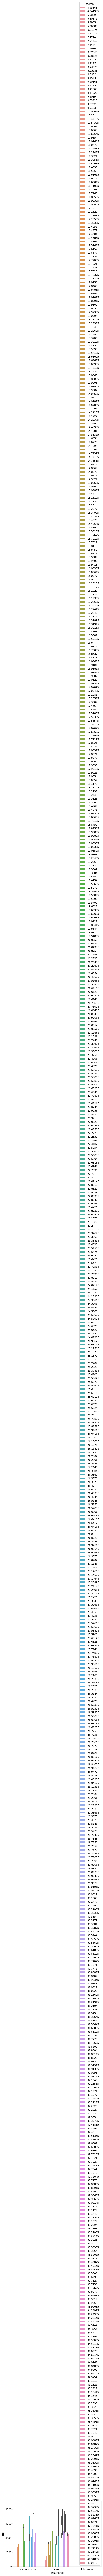

In [ ]:
sns.barplot(data=boombikes_1, x='weathersit', y="cnt", hue='atemp')

# Outlier Analysis

In [ ]:
# Lets check if there are any outliers in the dataset
cat_col = boombikes_1.select_dtypes(exclude = ["int", "float"]).columns.tolist()
cat_col

['season', 'mnth', 'weekday', 'weathersit']

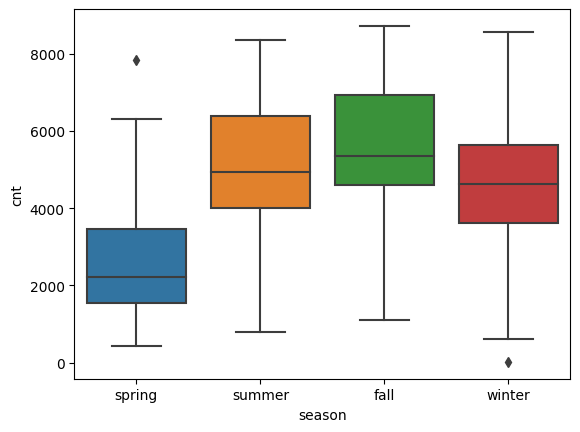

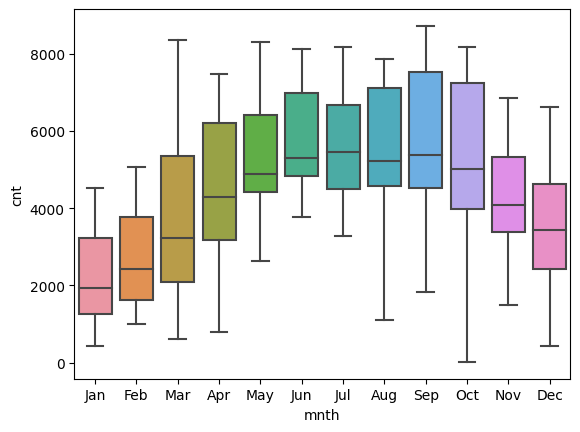

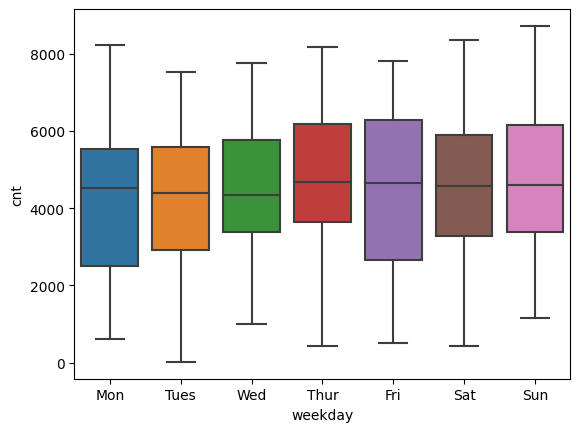

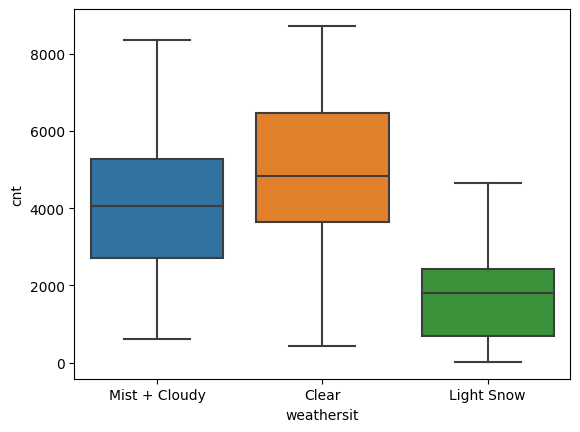

In [ ]:
for column in cat_col:
    boombikes_1[column] = boombikes_1[column].astype(str)
    sns.boxplot(data=boombikes_1, x=column, y="cnt")
    plt.show()
    print()
    print()

Observation

The dataset looks perfectly fine.

In [ ]:
# Lets see how the trend is varing among each columns
Num_col = boombikes_1.select_dtypes(["int", "float"]).columns
Num_col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

## Checking the relationship between numerical columns

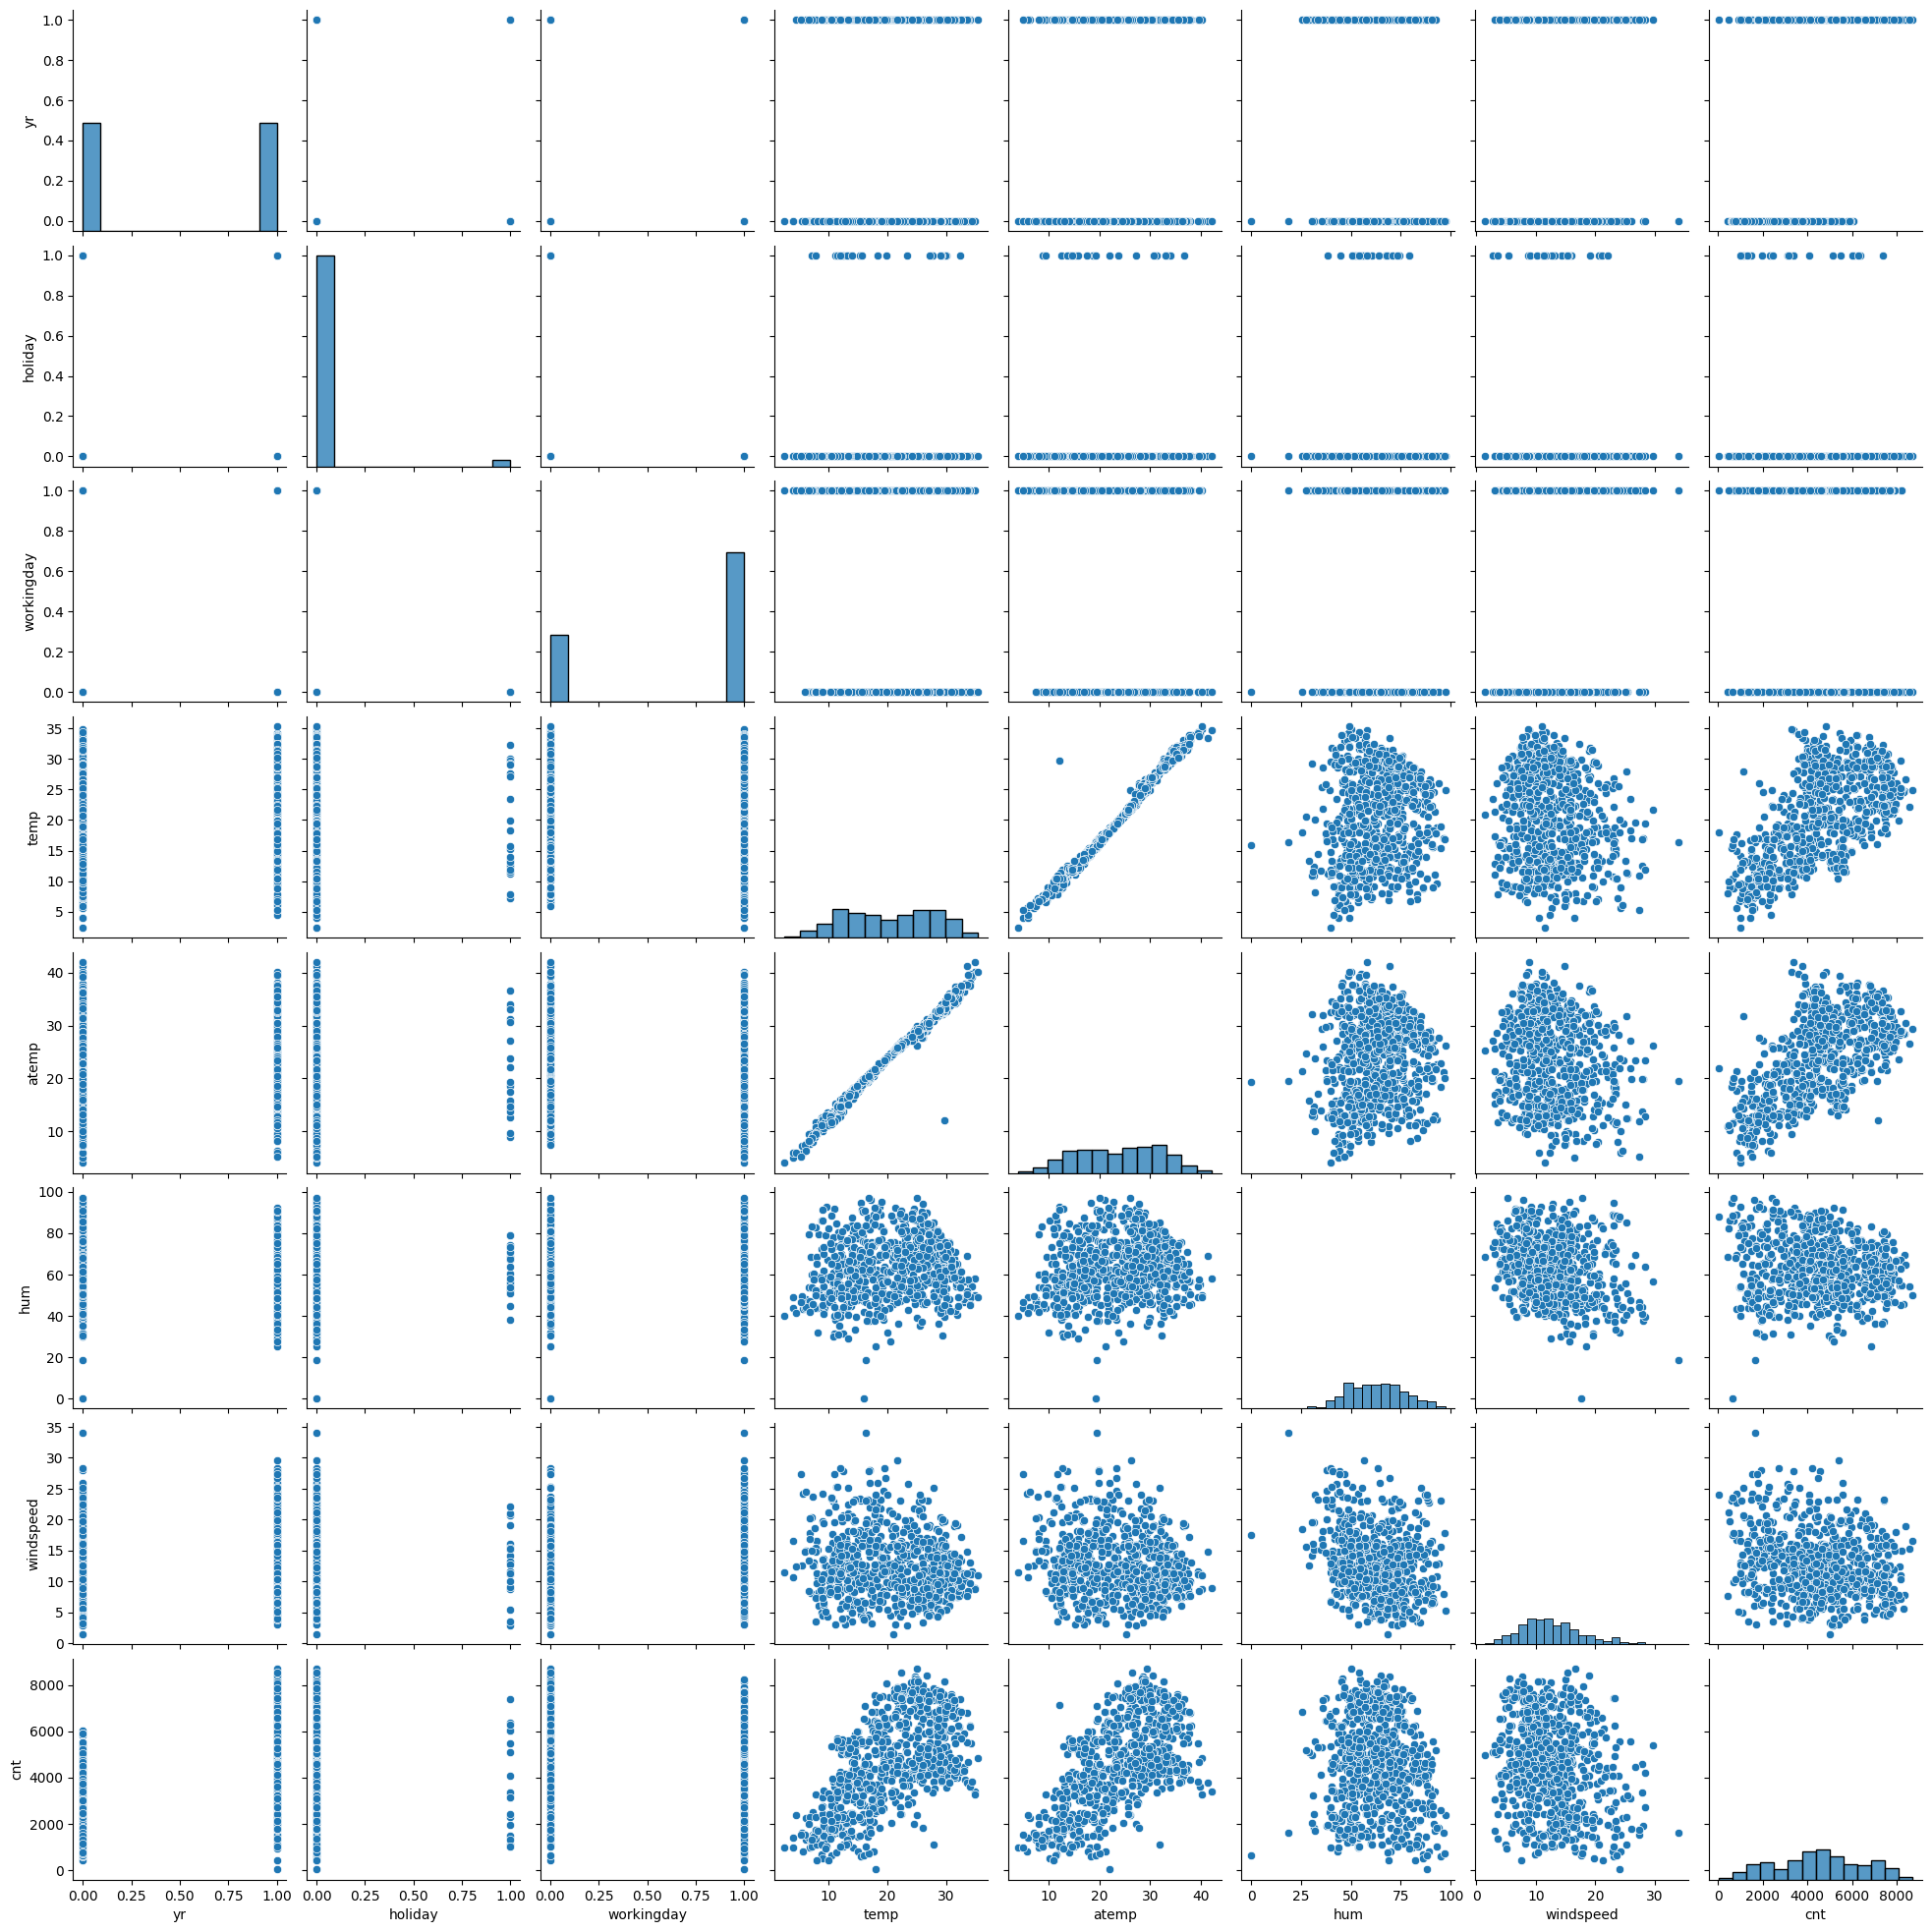

In [ ]:
sns.pairplot(boombikes_1[Num_col])

Observation

A positive co-relation between temp and atemp.

Mostly these two columns will have high correlation

In [ ]:
corr = boombikes_1[Num_col].corr()
corr

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   

            windspeed       cnt  
yr          -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.002453 -0.027640  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
hum         -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000

<Axes: >

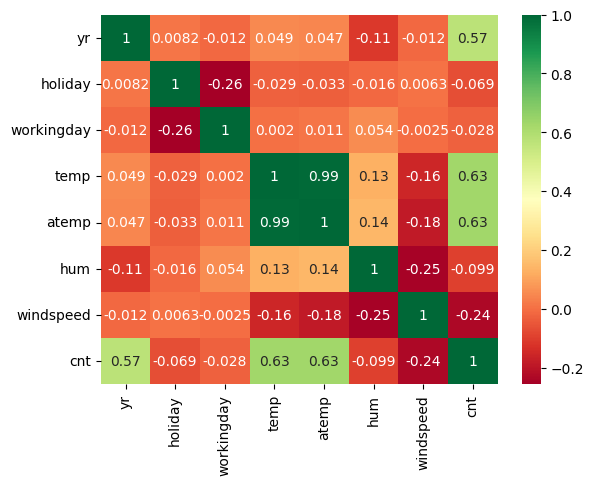

In [ ]:
sns.heatmap(corr, cmap='RdYlGn', annot=True)

Observation
As we guessed, in the previous segment
1. High +ve correlation between temp and atemp
2. High -ve correlation between windspeed and hum

# Creating Dummy Variables

In [ ]:
boombikes_1.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0    Tues           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0    Thur           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [ ]:
#Lets take the necessary columns to create dummy variables
cat_col_dummy = boombikes_1[["season", "mnth", "weekday", "weathersit"]]

**Note:**
We have taken only these columns because,

1. season: has 4 unique variables within it therefore creating 3 dummy variables make sense.

2. mnth: has 12 unique variables within it therefore creating 11 dummy variables make sense.

3. weekday: has 7 unique variables within it therefore creating 6 dummy variables make sense.

4. weathersit: has 4 unique variables within it therefore creating 3 dummy variables make sense.

Rest of the columns such as yr, holiday, workingday has only 2 unique variables, therefore creating 1 dummy variable for each doesnt make sense, therefore lets keep these columns as it is.


In [ ]:
#Lets verify the considered columns
cat_col_dummy.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [ ]:
#Lets create the dummy variables
boombikes_dummies = pd.get_dummies(cat_col_dummy, drop_first = True)
boombikes_dummies.head()

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  \
0         1         0         0         0         0         0         0   
1         1         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   
3         1         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  \
0         0            1            0            0             0   
1         0            0            0            0             0   
2         0            0            0            0             0   
3         0            0            0            0             1   
4         0            0            0            0             0   

   weekday_Tues  weekday_Wed  weathersit_Light Snow  weathersit_Mist + Cloudy  
0             0            0                      0                         1  
1             1            0                      0                         1  
2             0            1                      0                         0  
3             0            0                      0                         0  
4             0            0                      0                         0

## Merge the columns


In [ ]:
#Npw, lets merge the dummy variable dataset to our orginal boombike dataset
boombikes_2 = pd.concat([boombikes_1,boombikes_dummies], axis = 1)

In [ ]:
boombikes_2.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0    Tues           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0    Thur           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

      atemp      hum  windspeed   cnt  season_spring  season_summer  \
0  18.18125  80.5833  10.749882   985              1              0   
1  17.68695  69.6087  16.652113   801              1              0   
2   9.47025  43.7273  16.636703  1349              1              0   
3  10.60610  59.0435  10.739832  1562              1              0   
4  11.46350  43.6957  12.522300  1600              1              0   

   season_winter  mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  \
0              0         0         0         0         1         0         0   
1              0         0         0         0         1         0         0   
2              0         0         0         0         1         0         0   
3              0         0         0         0         1         0         0   
4              0         0         0         0         1         0         0   

   mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  \
0         0         0         0         0         0            1            0   
1         0         0         0         0         0            0            0   
2         0         0         0         0         0            0            0   
3         0         0         0         0         0            0            0   
4         0         0         0         0         0            0            0   

   weekday_Sun  weekday_Thur  weekday_Tues  weekday_Wed  \
0            0             0             0            0   
1            0             0             1            0   
2            0             0             0            1   
3            0             1             0            0   
4            0             0             0            0   

   weathersit_Light Snow  weathersit_Mist + Cloudy  
0                      0                         1  
1                      0                         1  
2                      0                         0  
3                      0                         0  
4                      0                         0

In [ ]:
boombikes_2.shape

(730, 34)

Observations

1. After merging the dummy variable dataframe to the original boombikes dataframe, the dataset has changed its shape increasing to 34 columns

2. Since we have created the dummy variables for few columns, keep those orginal columns in the orginal dataset doesnt make any sense as it becomes repeated data. So lets drop those rows.

In [ ]:
# Lets drop the unnecessary
boombikes_2.drop(["season", "mnth", "weekday", "weathersit"], axis = 1, inplace = True)

In [ ]:
boombikes_2.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  \
0         1         0         0         0         0         0         0   
1         1         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   
3         1         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  \
0         0            1            0            0             0   
1         0            0            0            0             0   
2         0            0            0            0             0   
3         0            0            0            0             1   
4         0            0            0            0             0   

   weekday_Tues  weekday_Wed  weathersit_Light Snow  weathersit_Mist + Cloudy  
0             0            0                      0                         1  
1             1            0                      0                         1  
2             0            1                      0                         0  
3             0            0                      0                         0  
4             0            0                      0                         0

In [ ]:
boombikes_2.shape

(730, 30)

Observation

After dropping unnecessary columns again we have 30 columns in total.

# Checking Correlation/Multicollinearity

In [ ]:
#Lets find the correlation among the variables
boombikes_2_corr = boombikes_2.corr().round(2)

<Axes: >

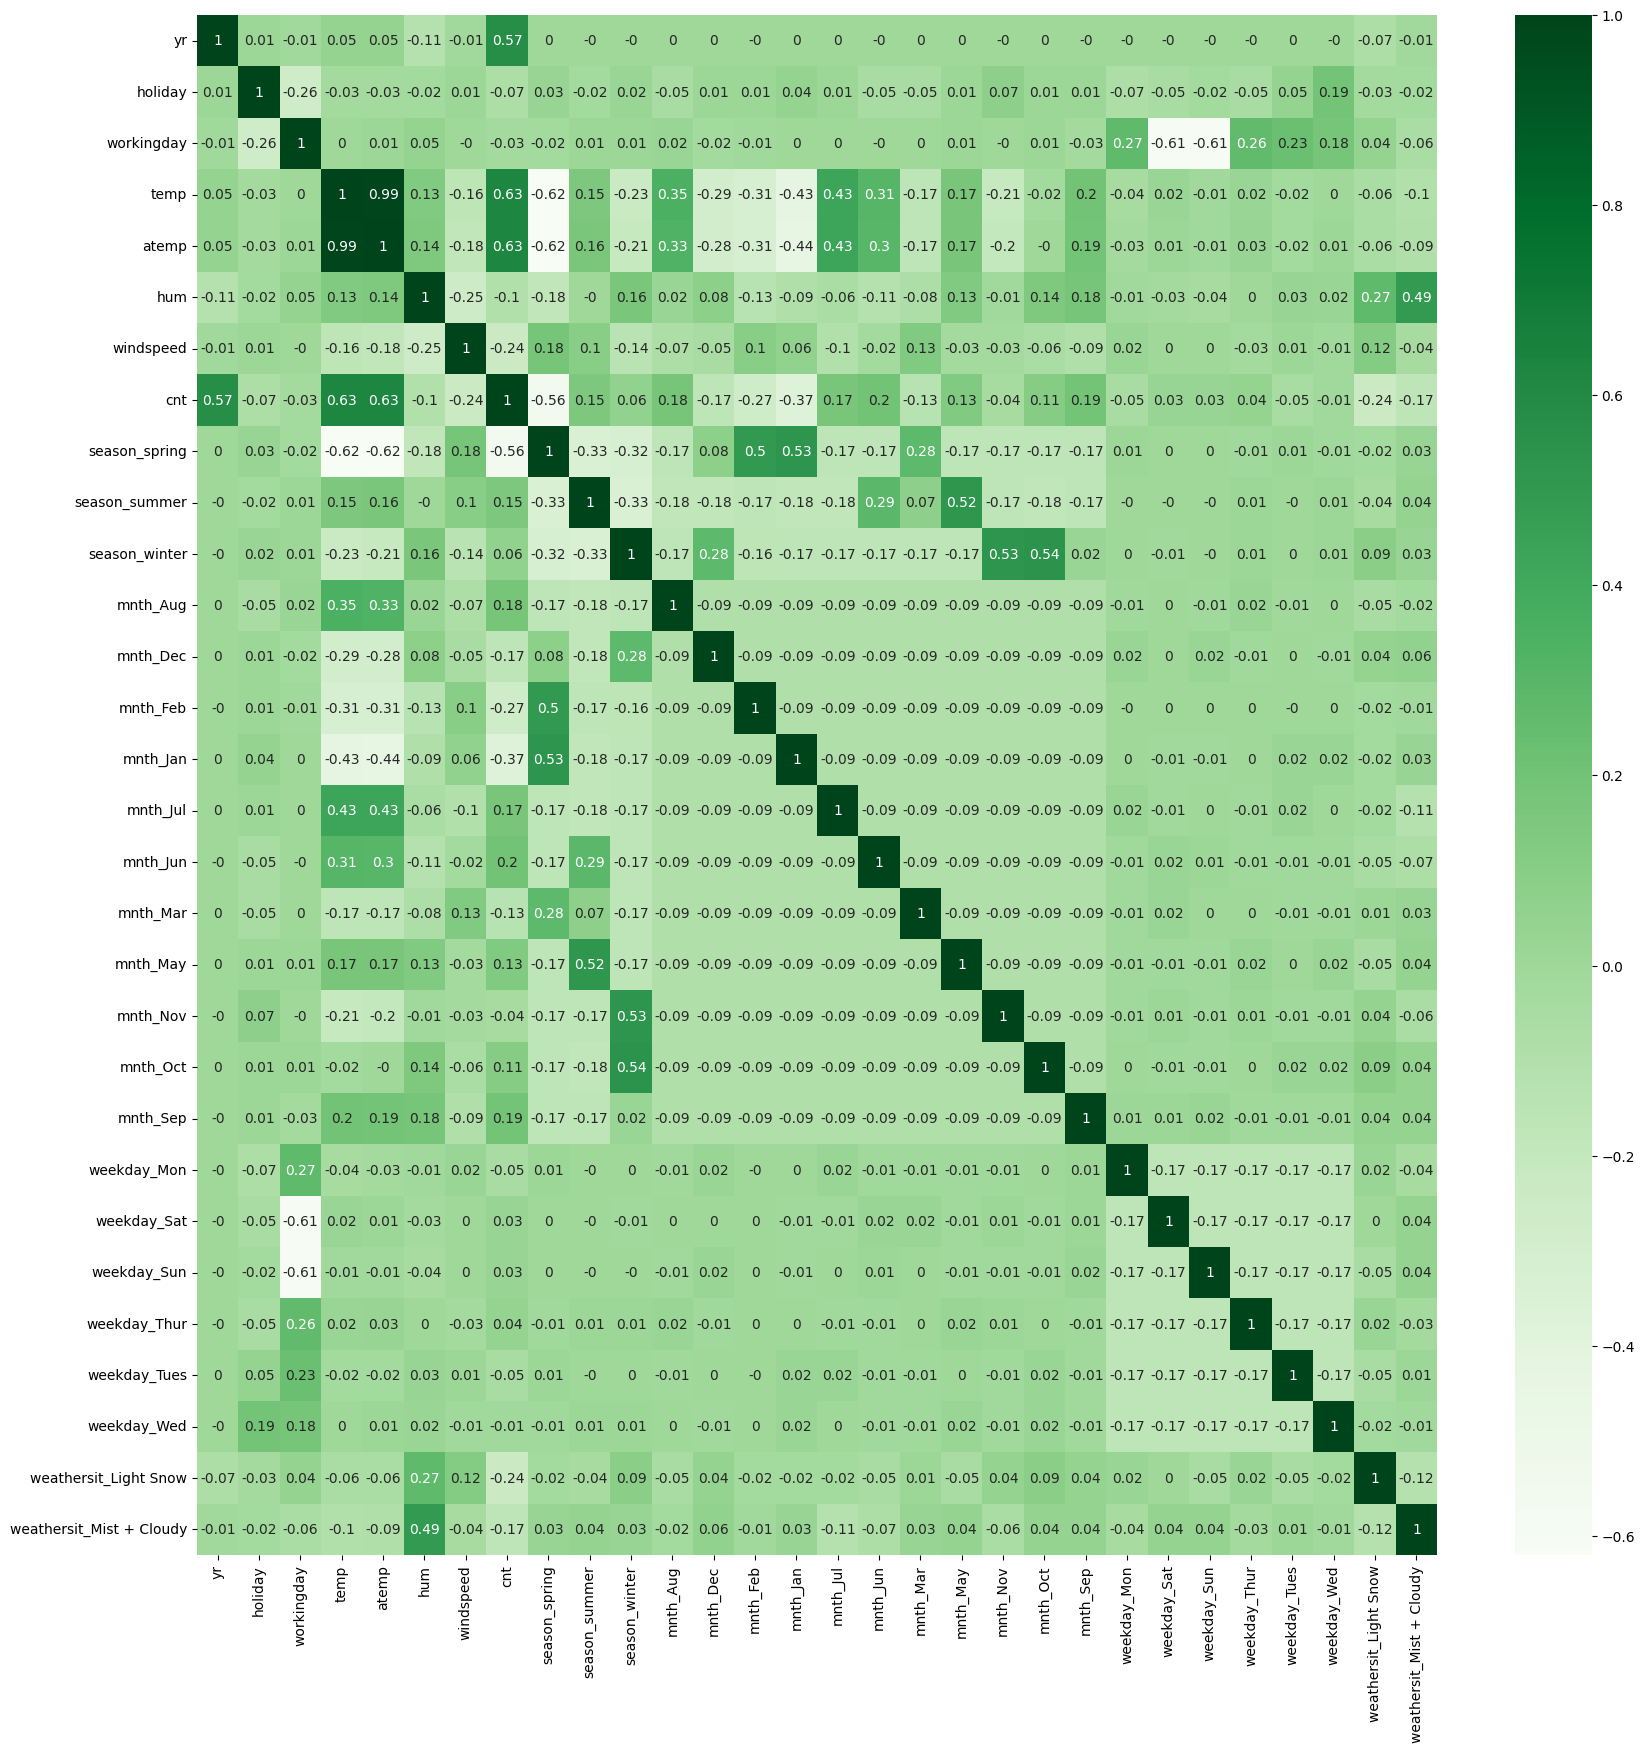

In [ ]:
plt.figure(figsize = (20,20))

sns.heatmap(boombikes_2_corr, cmap = "Greens", annot = True)

Observations

Better/high correlation exists between

1. Yr and cnt = 0.57

2. atemp and cnt = 0.63

3. atemp and mnth_jul = 0.43

4. hum and weathersit_mist+cloudt = 0.49

5. season_spring and mnth_feb = 0.5

6. season_spring and mnth_jan = 0.53

7. season_summer and mnth_may = 0.52

8. season_winter and mnth_nov = 0.53

9. season_winter and mnth_nov = 0.54


In [ ]:
plt.figure(figsize = (30,30))
sns.pairplot(boombikes_2)

<Figure size 3000x3000 with 0 Axes>

# Splitting the Data into Training and Testing Sets

Dividing the data into train and test data.

Train data = 0.7 or 70% of the dataset

Test data = 0.3 or 30% of the dataset

In [ ]:
np.random.seed(0) # To fetch the same set of random numbers everytime
boombikes_2_train, boombikes_2_test = train_test_split(boombikes_2, train_size = 0.7, test_size = 0.3, random_state = 100)

Here directly we have got the train and test datasets, the other method includes: getting the X_train, X_test, y_train, y_test separately and that is just another method.

In [ ]:
boombikes_2.shape

(730, 30)

In [ ]:
print(boombikes_2_train.shape)
print(boombikes_2_test.shape)

(510, 30)
(219, 30)


Observations

Looks the data is equally separated based on 70 and 30% as discussed

# Rescaling

In [ ]:
boombikes_2.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  \
0         1         0         0         0         0         0         0   
1         1         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   
3         1         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

   mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  \
0         0            1            0            0             0   
1         0            0            0            0             0   
2         0            0            0            0             0   
3         0            0            0            0             1   
4         0            0            0            0             0   

   weekday_Tues  weekday_Wed  weathersit_Light Snow  weathersit_Mist + Cloudy  
0             0            0                      0                         1  
1             1            0                      0                         1  
2             0            1                      0                         0  
3             0            0                      0                         0  
4             0            0                      0                         0

Scaling doesnt affect the model. As you can see in the dataset, columns ["temp","atemp", "hum", "windspeed", "cnt"] are in different scale compared to all other columns in the dataset. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.

**Let's go ahead with the MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Instantiate the object
scaler = MinMaxScaler()

In [ ]:
#Lets aapply the scalar to all the required columns
numeric_cols = ["temp","atemp", "hum", "windspeed", "cnt"]

boombikes_2_train[numeric_cols] = scaler.fit_transform(boombikes_2_train[numeric_cols] )

In [ ]:
boombikes_2_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_spring  season_summer  season_winter  mnth_Aug  \
653  0.864243              0              0              1         0   
576  0.827658              0              0              0         0   
426  0.465255              1              0              0         0   
728  0.204096              1              0              0         0   
482  0.482973              0              1              0         0   

     mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  \
653         0         0         0         0         0         0         0   
576         0         0         0         1         0         0         0   
426         0         0         0         0         0         1         0   
728         1         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   

     mnth_Nov  mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  \
653         0         1         0            0            0            0   
576         0         0         0            0            0            0   
426         0         0         0            0            0            1   
728         0         0         0            1            0            0   
482         0         0         0            0            0            1   

     weekday_Thur  weekday_Tues  weekday_Wed  weathersit_Light Snow  \
653             0             0            1                      0   
576             0             0            1                      0   
426             0             0            0                      0   
728             0             0            0                      0   
482             0             0            0                      0   

     weathersit_Mist + Cloudy  
653                         0  
576                         0  
426                         1  
728                         0  
482                         1

In [ ]:
boombikes_2_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_spring  season_summer  season_winter  \
count  510.000000  510.000000     510.000000     510.000000      510.00000   
mean     0.320768    0.513620       0.243137       0.245098        0.24902   
std      0.169797    0.224593       0.429398       0.430568        0.43287   
min      0.000000    0.000000       0.000000       0.000000        0.00000   
25%      0.199179    0.356420       0.000000       0.000000        0.00000   
50%      0.296763    0.518638       0.000000       0.000000        0.00000   
75%      0.414447    0.684710       0.000000       0.000000        0.00000   
max      1.000000    1.000000       1.000000       1.000000        1.00000   

         mnth_Aug    mnth_Dec    mnth_Feb    mnth_Jan    mnth_Jul    mnth_Jun  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.096078    0.084314    0.066667    0.088235    0.076471    0.074510   
std      0.294988    0.278131    0.249689    0.283915    0.266010    0.262857   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mnth_Mar    mnth_May    mnth_Nov    mnth_Oct    mnth_Sep  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.098039    0.084314    0.086275    0.086275    0.080392   
std      0.297660    0.278131    0.281045    0.281045    0.272166   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tues  \
count   510.000000   510.000000   510.000000    510.000000    510.000000   
mean      0.154902     0.129412     0.137255      0.143137      0.152941   
std       0.362166     0.335985     0.344454      0.350557      0.360284   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.000000     0.000000      0.000000      0.000000   
50%       0.000000     0.000000     0.000000      0.000000      0.000000   
75%       0.000000     0.000000     0.000000      0.000000      0.000000   
max       1.000000     1.000000     1.000000      1.000000      1.000000   

       weekday_Wed  weathersit_Light Snow  weathersit_Mist + Cloudy  
count   510.000000             510.000000                510.000000  
mean      0.135294               0.029412                  0.343137  
std       0.342373               0.169124                  0.475223  
min       0.000000               0.000000                  0.000000  
25%       0.000000               0.000000                  0.000000  
50%       0.000000               0.000000                  0.000000  
75%       0.000000               0.000000              

Observations

Since we have used MinMaxScaling to rescale the data, we can clearly see all the columns in the dataset is between 0 and 1.

#Training the Model

<Axes: >

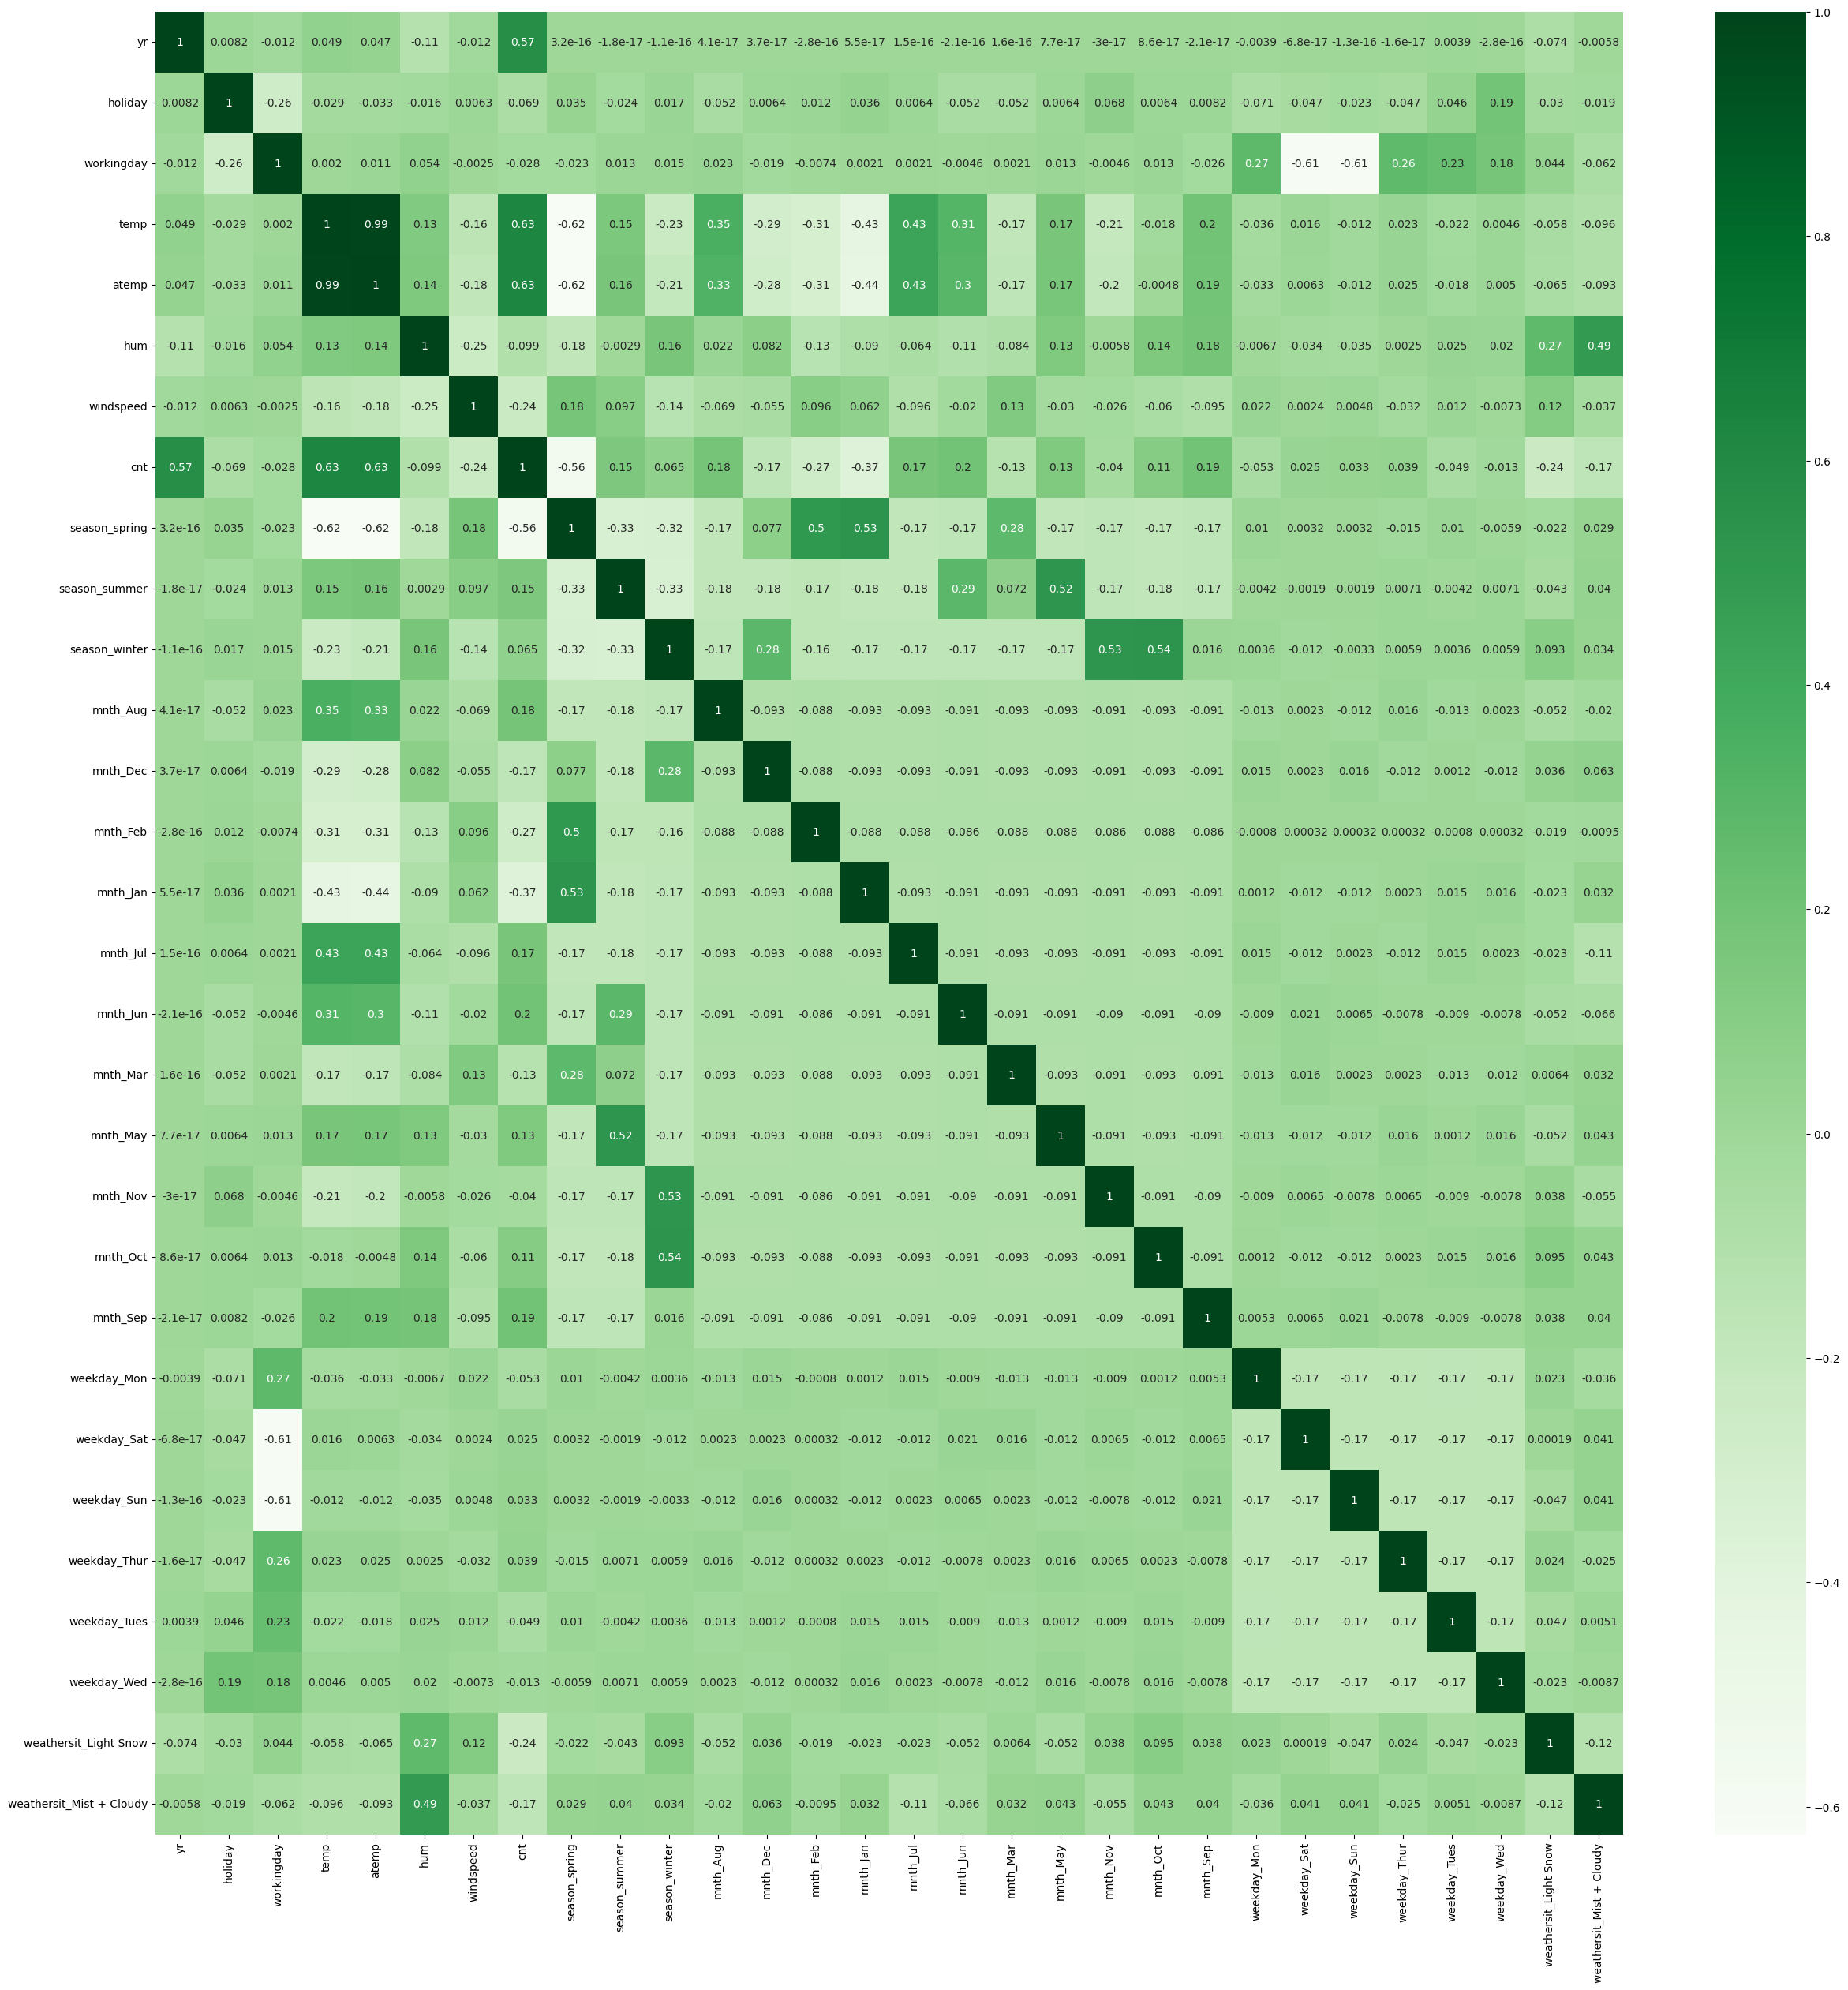

In [ ]:
#Let's check the correlation once again
plt.figure(figsize = (30,30))
sns.heatmap(boombikes_2.corr(), cmap = "Greens", annot = True)

Since 'y' is an dependent variable, as per our business model the dependent vaariable be 'cnt' in this case. Similarly, all other columns in the dataset will be independent variables

In [ ]:
#Lets assign the cnt to y
y_train = boombikes_2_train.pop("cnt")

In [ ]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [ ]:
#Lets assign all other variables apart from 'cnt' to X
X_train = boombikes_2_train

In [ ]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

     season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
653              0              0              1         0         0   
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         0         1   
482              0              1              0         0         0   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
653         0         0         0         0         0         0         0   
576         0         0         1         0         0         0         0   
426         0         0         0         0         1         0         0   
728         0         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   

     mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  \
653         1         0            0            0            0             0   
576         0         0            0            0            0             0   
426         0         0            0            0            1             0   
728         0         0            1            0            0             0   
482         0         0            0            0            1             0   

     weekday_Tues  weekday_Wed  weathersit_Light Snow  \
653             0            1                      0   
576             0            1                      0   
426             0            0                      0   
728             0            0                      0   
482             0            0                      0   

     weathersit_Mist + Cloudy  
653                         0  
576                         0  
426                         1  
728                         0  
482                         1

X will represent independent Variables

Y  will represent dependent Variables

# Building a linear model

Let's fit the regression line to the training data using statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
# Adding a constant
X_train_0 = sm.add_constant(X_train)

In [ ]:
#Verifying the constant
X_train_0.head()

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
653    1.0   1        0           1  0.509887  0.501133  0.575354   0.300794   
576    1.0   1        0           1  0.815169  0.766351  0.725633   0.264686   
426    1.0   1        0           0  0.442393  0.438975  0.640189   0.255342   
728    1.0   1        0           1  0.245101  0.200348  0.498067   0.663106   
482    1.0   1        0           0  0.395666  0.391735  0.504508   0.188475   

     season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
653              0              0              1         0         0   
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         0         1   
482              0              1              0         0         0   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
653         0         0         0         0         0         0         0   
576         0         0         1         0         0         0         0   
426         0         0         0         0         1         0         0   
728         0         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   

     mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  \
653         1         0            0            0            0             0   
576         0         0            0            0            0             0   
426         0         0            0            0            1             0   
728         0         0            1            0            0             0   
482         0         0            0            0            1             0   

     weekday_Tues  weekday_Wed  weathersit_Light Snow  \
653             0            1                      0   
576             0            1                      0   
426             0            0                      0   
728             0            0                      0   
482             0            0                      0   

     weathersit_Mist + Cloudy  
653                         0  
576                         0  
426                         1  
728                         0  
482                         1

Observation

You can see the column called constant has been added to the dataset

In [ ]:
# Creating the first fitted model
lm_0 = sm.OLS(y_train, X_train_0).fit()

In [ ]:
# Lets check for parameters
lm_0.params

const                       0.394765
yr                          0.230933
holiday                    -0.135245
workingday                 -0.060878
temp                        0.400268
atemp                       0.046419
hum                        -0.157757
windspeed                  -0.181137
season_spring              -0.044097
season_summer               0.041756
season_winter               0.110482
mnth_Aug                    0.023034
mnth_Dec                   -0.045685
mnth_Feb                   -0.037177
mnth_Jan                   -0.063451
mnth_Jul                   -0.033912
mnth_Jun                    0.002144
mnth_Mar                    0.000805
mnth_May                    0.024765
mnth_Nov                   -0.041530
mnth_Oct                    0.005922
mnth_Sep                    0.086720
weekday_Mon                -0.024668
weekday_Sat                -0.056309
weekday_Sun                -0.050307
weekday_Thur                0.003841
weekday_Tues               -0.026341
w

Observation

1. The constant is 0.39. which means the regression line will be at 0.39 in y-axis when x-axis is zero.

2. This means, even when all the independent variables are zero, still the dependent variables will be equal to 0.39 units.


In [ ]:
#Lets look at the summary for more details
print(lm_0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          4.09e-178
Time:                        20:15:16   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**observation**

Since most of the variables are with high p-values, this means the results are stastically insignificant

lets follow RFE to filter out the best variables for best fit. we are using RFE becuase this function is autonomous it directly proper information on how important the variable is. we also have another approach, such as forward approach (adding the independent variables to the model until the best fit is detected) and backward approach (removing the independent variables to the model until the best fit is detected). Since RFE helps with all  these it is autonomous, therefore lets proceed with that.

## RFE

RFE: Recursive feature elimination

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 20
lm_1 = LinearRegression()
Model_1 = lm_1.fit(X_train, y_train)
# running RFE
rfe = RFE(Model_1, n_features_to_select= 20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Lets see the importance of each variable
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 8),
 ('weekday_Tues', False, 3),
 ('weekday_Wed', False, 6),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

**Obseravtions**

You can clearly see that, these columns 'mnth_Aug', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct', 'weekday_Mon', 'weekday_Thur', 'weekday_Tues', 'weekday_Wed' aren't recommended by RFE. So its better to  drop them

In [ ]:
#Lets filter all the imortant variables
X_train_columns =  X_train.columns[rfe.support_]
X_train_columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [ ]:
# Let's take out the unnecessary columns
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thur', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[X_train_columns]

## Model 1

In [ ]:
# Creating X_train dataframe with RFE selected variables
X_train_1 = sm.add_constant(X_train_rfe)

In [ ]:
X_train_1.head()

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
653    1.0   1        0           1  0.509887  0.501133  0.575354   0.300794   
576    1.0   1        0           1  0.815169  0.766351  0.725633   0.264686   
426    1.0   1        0           0  0.442393  0.438975  0.640189   0.255342   
728    1.0   1        0           1  0.245101  0.200348  0.498067   0.663106   
482    1.0   1        0           0  0.395666  0.391735  0.504508   0.188475   

     season_spring  season_summer  season_winter  mnth_Dec  mnth_Feb  \
653              0              0              1         0         0   
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         1         0   
482              0              1              0         0         0   

     mnth_Jan  mnth_Jul  mnth_Nov  mnth_Sep  weekday_Sat  weekday_Sun  \
653         0         0         0         0            0            0   
576         0         1         0         0            0            0   
426         0         0         0         0            0            1   
728         0         0         0         0            0            0   
482         0         0         0         0            0            1   

     weathersit_Light Snow  weathersit_Mist + Cloudy  
653                      0                         0  
576                      0                         0  
426                      0                         1  
728                      0                         0  
482                      0                         1

In [ ]:
lm_1 = sm.OLS(y_train, X_train_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          2.51e-185
Time:                        20:15:16   Log-Likelihood:                 518.74
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     489   BIC:                            -906.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Observations**

Instead of dropping all the variables that has p-value higher then 0.05, lets drop it one after the other based on the changes in P-vaues that occure after each drop.

Here, Since the column "atemp" is the most insignificant variable becuase of this high P-value,

## Model 2

In [ ]:
#Lets rebuild the model after dropping "weekday_Sun"
X_train_2 = X_train_1.drop(["atemp"], axis = 1)
X_train_2 = sm.add_constant(X_train_2)
lm_2 = sm.OLS(y_train, X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          2.11e-186
Time:                        20:15:16   Log-Likelihood:                 518.71
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     490   BIC:                            -912.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Observation**

After dropping the "atemp", you can see some changes in the p-values. Here lets drop the column "weekday_Sun" since it is insignificant with a hughP-value of 0.647

##Model 3

In [ ]:
#Lets rebuild the model after dropping "weekday_Sun"
X_train_3 = X_train_2.drop(["weekday_Sun"], axis = 1)
X_train_3 = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train, X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          1.88e-187
Time:                        20:15:16   Log-Likelihood:                 518.60
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     491   BIC:                            -918.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Observation**

Here lets drop the column "weekday_Sat" since it is insignificant with a high P-value of 0.658

## Model 4

In [ ]:
#Lets rebuild the model after dropping "mnth_may"
X_train_4 = X_train_3.drop(["weekday_Sat"], axis = 1)
X_train_4 = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train, X_train_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          1.60e-188
Time:                        20:15:17   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Observation**

Here lets drop the column "mnth_Feb" since it is insignificant with a high P-value of 0.103

## Model 5

In [ ]:
#Lets rebuild the model after dropping "season_spring"
X_train_5 = X_train_4.drop(["mnth_Feb"], axis = 1)
X_train_5 = sm.add_constant(X_train_5)
lm_5 = sm.OLS(y_train, X_train_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          4.55e-189
Time:                        20:15:17   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Observation**

You can observe all the P-values are within our confidence level i.e 5%. Now, lets also check the inconsistencies in the dataset using VIF(variance_inflation_factor)

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
# lets import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_train_5.head() # is our latest dataset

const  yr  holiday  workingday      temp       hum  windspeed  \
653    1.0   1        0           1  0.509887  0.575354   0.300794   
576    1.0   1        0           1  0.815169  0.725633   0.264686   
426    1.0   1        0           0  0.442393  0.640189   0.255342   
728    1.0   1        0           1  0.245101  0.498067   0.663106   
482    1.0   1        0           0  0.395666  0.504508   0.188475   

     season_spring  season_summer  season_winter  mnth_Dec  mnth_Jan  \
653              0              0              1         0         0   
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         1         0   
482              0              1              0         0         0   

     mnth_Jul  mnth_Nov  mnth_Sep  weathersit_Light Snow  \
653         0         0         0                      0   
576         1         0         0                      0   
426         0         0         0                      0   
728         0         0         0                      0   
482         0         0         0                      0   

     weathersit_Mist + Cloudy  
653                         0  
576                         0  
426                         1  
728                         0  
482                         1

Since after dropping all the unnecessary variables, X_train_6 is our latest dataset, but this dataset is with the constant value. But for VIF we dont usually consider Constant variable. Therfore lets proceed with the same dataset after removing this entire constant column

### VIF 1

In [ ]:
#Removing constant column
vif_dataset1 = X_train_5.drop("const", axis =1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_1 = pd.DataFrame()
vif_1["Features"] = vif_dataset1.columns
vif_1["VIF"] = [ variance_inflation_factor(vif_dataset1.values, i) for i in range(vif_dataset1.shape[1]) ]
vif_1.sort_values(by = "VIF", ascending = False)

Features        VIF
4                        hum  31.915079
3                       temp  17.920774
5                  windspeed   4.752928
6              season_spring   4.419969
8              season_winter   4.095086
2                 workingday   3.688707
7              season_summer   2.832105
15  weathersit_Mist + Cloudy   2.367204
0                         yr   2.088704
12                  mnth_Nov   1.836774
10                  mnth_Jan   1.747464
11                  mnth_Jul   1.594322
9                   mnth_Dec   1.550273
13                  mnth_Sep   1.411092
14     weathersit_Light Snow   1.282825
1                    holiday   1.136412

**Observations**

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

Again lets drop each variable one after the other. Here since The variable "hum" has very high VIF. Lets drop this

## Model 6

In [ ]:
#Lets rebuild the model after dropping "hum"
X_train_6 = X_train_5.drop("hum", axis = 1)
X_train_6 = sm.add_constant(X_train_6)
lm_6 = sm.OLS(y_train, X_train_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          1.13e-186
Time:                        20:15:17   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Observations**

All the P-values look significant. But sometimes even the high correlated variable will be shown significant. Therefore it is advisible to check it with VIF

## VIF 2

In [ ]:
#Lets drop constant variables since this is not required
vif_dataset2 = X_train_6.drop("const", axis =1)
vif_2 = pd.DataFrame()
vif_2["Features"] = vif_dataset2.columns
vif_2["VIF"] = [ variance_inflation_factor(vif_dataset2.values, i) for i in range(vif_dataset2.shape[1]) ]
vif_2.sort_values(by = "VIF", ascending = False)

Features       VIF
3                       temp  6.109293
4                  windspeed  4.684895
2                 workingday  3.575964
5              season_spring  3.077512
7              season_winter  3.074426
6              season_summer  2.314179
0                         yr  2.073691
11                  mnth_Nov  1.808901
9                   mnth_Jan  1.664456
10                  mnth_Jul  1.593682
14  weathersit_Mist + Cloudy  1.564209
8                   mnth_Dec  1.460768
12                  mnth_Sep  1.355098
1                    holiday  1.133943
13     weathersit_Light Snow  1.087192

**Observations**

Looks all the p-values are close to zero, this means all are significant and the temp has slightly higher VIF ~6. Even then we cannot drop this column becuase this temp variable is equally important to the model. As well as Since it is just 1 point higher then the expected range, it doesnt effect the accuracy to th major extent.

In [ ]:
lm_6.params

const                       0.264576
yr                          0.234151
holiday                    -0.109022
workingday                 -0.022600
temp                        0.436214
windspeed                  -0.159031
season_spring              -0.071883
season_summer               0.033886
season_winter               0.089846
mnth_Dec                   -0.046208
mnth_Jan                   -0.050298
mnth_Jul                   -0.050926
mnth_Nov                   -0.041068
mnth_Sep                    0.067735
weathersit_Light Snow      -0.293908
weathersit_Mist + Cloudy   -0.083300
dtype: float64

**Observation**

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

Before making the predictions, you need to be certain that the model is reliable. To that end, you need to first perform a residual analysis of the error terms and then move on to making the predictions on the test set; and finally, evaluate the model based on the predictions.

# Residual Analysis (Checking the Assumption)

In residual analysis, our goal is to get the actual dependent variable vales and the predicted dependent variable values, compute the difference between them. Later as per the assumptions of linear regression, we have to check if the difference between them follows the normal distrubution or not as well as we alos have to check if this difference is following any patters (it shouldnt follow the pattern)

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_pred = lm_6.predict(X_train_6) #X_train_6 is the latest set

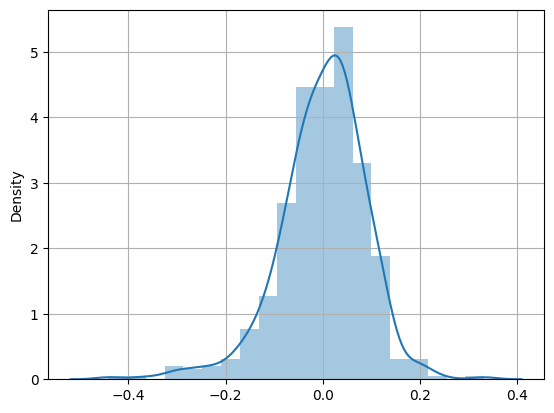

In [ ]:
# Plot the histogram of the error terms
plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.grid()

**Observations**

As per linear regression assumption, the error values have the mean close to zero or zero. we can proceed further

## Homoscedasticity (Assumption)

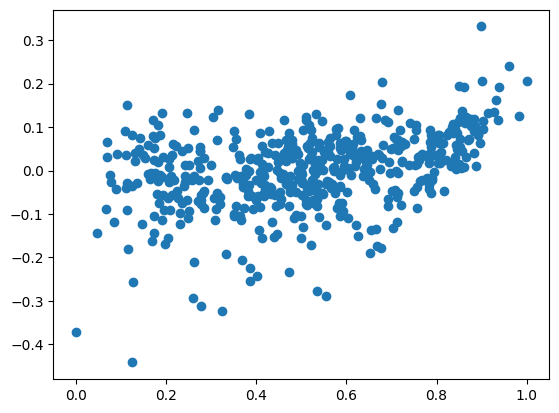

In [ ]:
#Lets verify the homoscedasticity
res = y_train-y_train_pred
plt.scatter(y_train,res)
plt.show()

Observation

It is clearly seen that the datapoints in thisn scatter are random and doesnt giving any type of pattern. Therefore we are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Also as per linear regression assumption the datapoints are scattered

In [ ]:
#Lets check the R2 Value for our trained Dataset
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8417855795904907

Observation

In linear regression, the R-squared value, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It indicates the goodness of fit of the regression model to the data.

An R-squared value of 0.841 means that approximately 84.1% of the variance in the dependent variable can be explained by the independent variable(s) included in the regression model. This suggests that the model provides a reasonably good fit to the data, as a higher R-squared value indicates a better fit.

#Making Predictions Using the Final Model

Before we build the model, we did some scaling to make sure all the values in the variables are on the same scale. This scaling has to be done on test data too, becuase was model is build on the scaled data

We should have done thee scaling while doing it for train dataset but we missied. So lets do it here

In [ ]:
#Lets scale the test dataset
boombikes_2_test[numeric_cols] = scaler.transform(boombikes_2_test[numeric_cols] )

we should understand that in Machine Learning, we arent making the model to learn anyting on the test data. Test data should always be unseen values and we need the model to predict the targets on this unseen values.

In [ ]:
boombikes_2_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.481313    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt  season_spring  season_summer  season_winter  \
count  219.000000  219.000000     219.000000     219.000000     219.000000   
mean     0.313350    0.520592       0.255708       0.264840       0.232877   
std      0.159947    0.218435       0.437258       0.442259       0.423633   
min     -0.042808    0.048205       0.000000       0.000000       0.000000   
25%      0.198517    0.377531       0.000000       0.000000       0.000000   
50%      0.299459    0.524275       0.000000       0.000000       0.000000   
75%      0.403048    0.672745       1.000000       1.000000       0.000000   
max      0.807474    0.963300       1.000000       1.000000       1.000000   

         mnth_Aug    mnth_Dec    mnth_Feb    mnth_Jan    mnth_Jul    mnth_Jun  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.059361    0.086758    0.100457    0.077626    0.105023    0.095890   
std      0.236840    0.282125    0.301297    0.268194    0.307285    0.295115   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mnth_Mar    mnth_May    mnth_Nov    mnth_Oct    mnth_Sep  \
count  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.054795    0.086758    0.073059    0.082192    0.086758   
std      0.228100    0.282125    0.260830    0.275286    0.282125   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tues  \
count   219.000000   219.000000   219.000000    219.000000    219.000000   
mean      0.118721     0.173516     0.155251      0.141553      0.123288   
std       0.324202     0.379560     0.362974      0.349389      0.329520   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.000000     0.000000      0.000000      0.000000   
50%       0.000000     0.000000     0.000000      0.000000      0.000000   
75%       0.000000     0.000000     0.000000      0.000000      0.000000   
max       1.000000     1.000000     1.000000      1.000000      1.000000   

       weekday_Wed  weathersit_Light Snow  weathersit_Mist + Cloudy  
count   219.000000             219.000000                219.000000  
mean      0.155251               0.027397                  0.319635  
std       0.362974               0.163612                  0.467403  
min       0.000000               0.000000                  0.000000  
25%       0.000000               0.000000                  0.000000  
50%       0.000000               0.000000                  0.000000  
75%       0.000000               0.000000              

**Observation**

note that the min and max values are matching to our scaled training dataset. or the values are veery close to 0 and 1

#Splitting the test dataset

#### Dividing into X_test and y_test

Lets assign indeependent and dependent variables to X and y test dataset

In [ ]:
boombikes_2_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           0  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           0  0.817246  0.741471  0.314298   0.537414   

          cnt  season_spring  season_summer  season_winter  mnth_Aug  \
184  0.692706              0              0              0         0   
535  0.712034              0              1              0         0   
299  0.303382              0              0              1         0   
221  0.547400              0              0              0         1   
152  0.569029              0              1              0         0   

     mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  \
184         0         0         0         1         0         0         0   
535         0         0         0         0         1         0         0   
299         0         0         0         0         0         0         0   
221         0         0         0         0         0         0         0   
152         0         0         0         0         1         0         0   

     mnth_Nov  mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  \
184         0         0         0            0            0            0   
535         0         0         0            0            0            0   
299         0         1         0            0            1            0   
221         0         0         0            0            0            0   
152         0         0         0            0            1            0   

     weekday_Thur  weekday_Tues  weekday_Wed  weathersit_Light Snow  \
184             0             0            1                      0   
535             1             0            0                      0   
299             0             0            0                      0   
221             0             0            0                      0   
152             0             0            0                      0   

     weathersit_Mist + Cloudy  
184                         1  
535                         0  
299                         1  
221                         0  
152                         0

In [ ]:
y_test = boombikes_2_test.pop("cnt")

In [ ]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [ ]:
# As a final call, we will be dealing with these many variables
final_cols = vif_dataset2.columns
final_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [ ]:
X_test = boombikes_2_test[vif_dataset2.columns]

In [ ]:
X_test.shape

(219, 15)

In [ ]:
X_test.head()

yr  holiday  workingday      temp  windspeed  season_spring  \
184   0        1           0  0.831783   0.084219              0   
535   1        0           1  0.901354   0.153728              0   
299   0        0           0  0.511964   0.334206              0   
221   0        0           1  0.881625   0.339570              0   
152   0        0           0  0.817246   0.537414              0   

     season_summer  season_winter  mnth_Dec  mnth_Jan  mnth_Jul  mnth_Nov  \
184              0              0         0         0         1         0   
535              1              0         0         0         0         0   
299              0              1         0         0         0         0   
221              0              0         0         0         0         0   
152              1              0         0         0         0         0   

     mnth_Sep  weathersit_Light Snow  weathersit_Mist + Cloudy  
184         0                      0                         1  
535         0                      0                         0  
299         0                      0                         1  
221         0                      0                         0  
152         0                      0                         0

In [ ]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [ ]:
X_test.head()

const  yr  holiday  workingday      temp  windspeed  season_spring  \
184    1.0   0        1           0  0.831783   0.084219              0   
535    1.0   1        0           1  0.901354   0.153728              0   
299    1.0   0        0           0  0.511964   0.334206              0   
221    1.0   0        0           1  0.881625   0.339570              0   
152    1.0   0        0           0  0.817246   0.537414              0   

     season_summer  season_winter  mnth_Dec  mnth_Jan  mnth_Jul  mnth_Nov  \
184              0              0         0         0         1         0   
535              1              0         0         0         0         0   
299              0              1         0         0         0         0   
221              0              0         0         0         0         0   
152              1              0         0         0         0         0   

     mnth_Sep  weathersit_Light Snow  weathersit_Mist + Cloudy  
184         0                      0                         1  
535         0                      0                         0  
299         0                      0                         1  
221         0                      0                         0  
152         0                      0                         0

**Observations**

Constant is added to the test dataste

In [ ]:
X_test.shape

(219, 16)

# Making Predictions

In [ ]:
# Making predictions using the eight model
y_test_pred = lm_6.predict(X_test)

In [ ]:
#Let's calculate the R2-Squared for the test
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8160235878128288

In [ ]:
#Let's calculate the R2-Squared for the train
from sklearn.metrics import r2_score
r2_score(y_true = y_train, y_pred = y_train_pred)

0.8417855795904907

**Observation**

Therefore, for test model we have a r2-square of ~0.82, and for train dataset we had ~0.84.

Too close...!

We can say that what the model has learnt on the trainig set has generalized very well on the test dataser

## Mean Squared Error (MSE)

In [ ]:
#Lets evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
mse

0.008738108377419333

The mean squared error (MSE) is a measure of the average squared difference between the predicted values and the actual values of the dependent variable. It quantifies the overall quality of the regression model's predictions.

A mean squared error value of 0.0081 indicates that, on average, the squared difference between the predicted values and the actual values is 0.0081. Since the MSE is calculated by taking the average of the squared errors, a lower MSE indicates a better fit of the regression model to the data.

# Model Evaluation

Text(0, 0.5, 'y_pred')

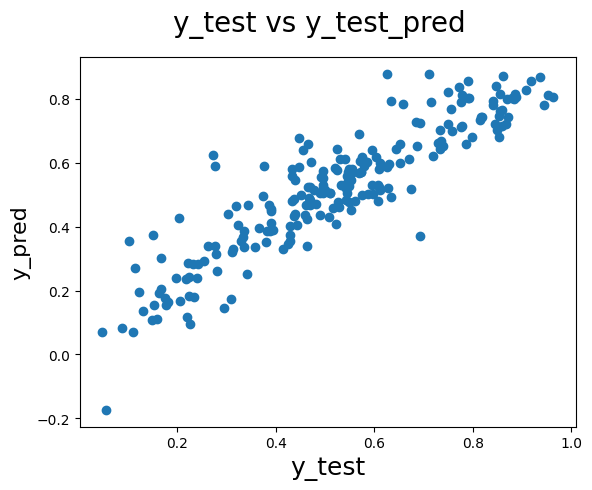

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Lets write a equation based on the co-efficients taking from our last trained model.


We can see that the equation of our best fitted line is:

Cnt = 0.264576 * const + 0.234151 * yr -0.109022 * holiday - 0.022600 * workingday + 0.436214 * temp -0.159031 * windspeed - 0.071883 * season_spring + 0.033886 * season_summer + 0.089846 * season_winter - 0.046208 * mnth_Dec -0.050298 * mnth_Jan - 0.050926 * mnth_Jul -0.041068 * mnth_Nov + 0.067735 * mnth_Sep - 0.293908 * weathersit_Light Snow -0.083300 * weathersit_Mist + Cloudy